Marunga Daisy <br>
M24B13/022<br>
B27261<br>
BSIT 1:2<br>

In [1]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
#load the dataset 
data = pd.read_csv('Assignment 4_Remedial.csv')

In [4]:
#preview the dataset
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


#### QUESTION ONE: It is believed that variables "BMI" and "AgeCategory" are key indicators of "KidneyDisease". Is this true?

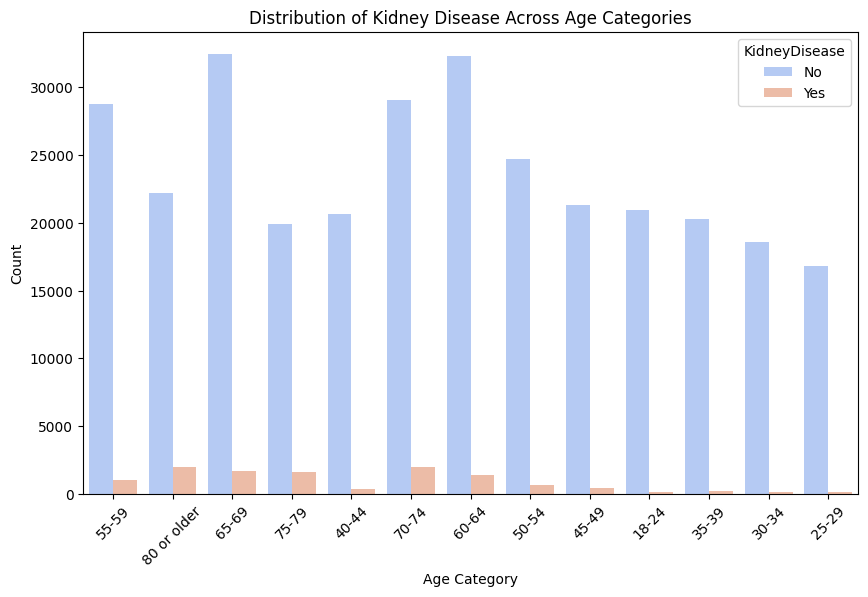

/var/folders/0d/78x91bw97r79yh5w691tk39c0000gn/T/ipykernel_13215/2405220130.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='KidneyDisease', y='BMI', data=data, palette='coolwarm')


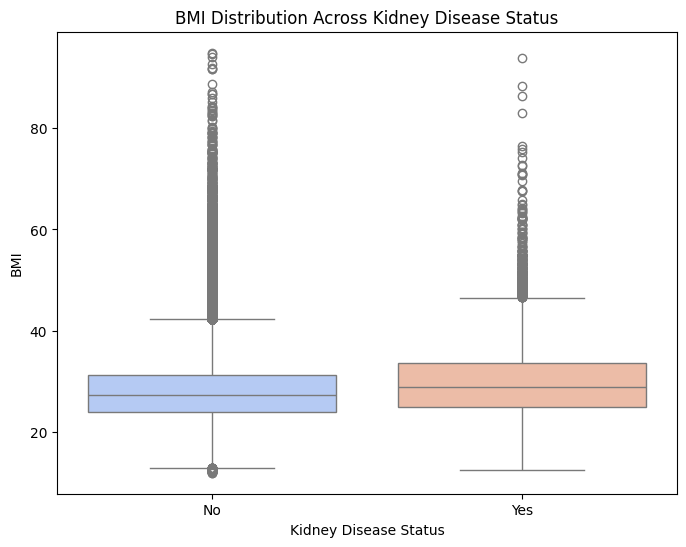

Chi-Square Test: chi2=5198.26259786746, p-value=0.0
There is a significant relationship between AgeCategory and KidneyDisease.


In [5]:
#Bar plot to show distribution of KidneyDisease across AgeCategories
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeCategory', hue='KidneyDisease', data=data, palette='coolwarm')

#labels and title
plt.title("Distribution of Kidney Disease Across Age Categories")
plt.xlabel("Age Category")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotated the labels for easy readability
plt.show()

#box plot to compare BMI across KidneyDisease groups
plt.figure(figsize=(8, 6))
sns.boxplot(x='KidneyDisease', y='BMI', data=data, palette='coolwarm')

#labels and title
plt.title("BMI Distribution Across Kidney Disease Status")
plt.xlabel("Kidney Disease Status")
plt.ylabel("BMI")
plt.show()


from scipy.stats import chi2_contingency

#creating a contingency table
contingency_table = pd.crosstab(data['AgeCategory'], data['KidneyDisease'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test: chi2={chi2}, p-value={p}")

# Explanation based on these stats
if p < 0.05:
    print("There is a significant relationship between AgeCategory and KidneyDisease.")
else:
    print("There is no significant relationship between AgeCategory and KidneyDisease.")


is p-value really 0.0

#### QUESTION TWO: Explain the distribution of probability of any continuous variable


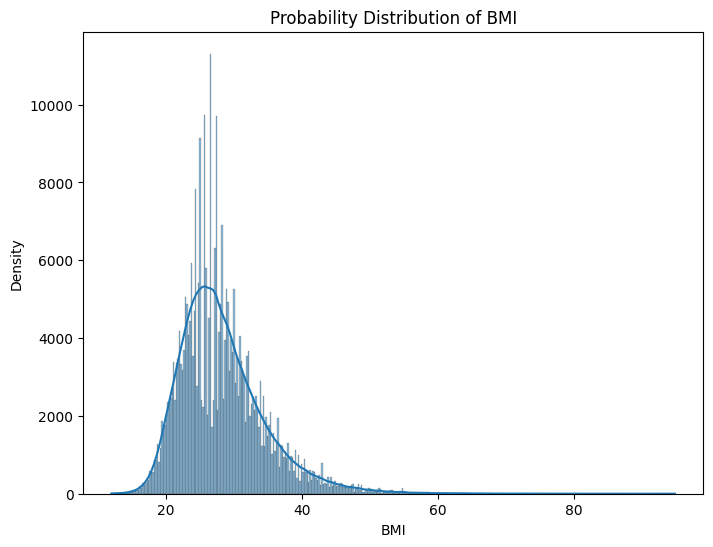

In [6]:
#figure size for the plot
plt.figure(figsize=(8, 6))

#Create a histogram with a Kernel Density Estimate (KDE)
sns.histplot(data['BMI'], kde=True)

#title of the plot
plt.title('Probability Distribution of BMI')

# Label the x-axis as 'BMI'
plt.xlabel('BMI')

# Label the y-axis as 'Density'
plt.ylabel('Density')

# Display the plot
plt.show()

#### QUESTION THREE: What is the probability that a person who smokes has SkinCancer?

In [7]:
# Count the number of smokers with skin cancer
smokers_with_skin_cancer = data[(data['Smoking'] == 'Yes') & (data['SkinCancer'] == 'Yes')].shape[0]

# Total number of smokers
total_smokers = data[data['Smoking'] == 'Yes'].shape[0]

# Calculate probability
probability_skin_cancer_given_smoking = smokers_with_skin_cancer / total_smokers
print(f"Probability of Skin Cancer given Smoking: {probability_skin_cancer_given_smoking:.4f}")


Probability of Skin Cancer given Smoking: 0.1050


Probability of Skin Cancer given Smoking: 0.1050


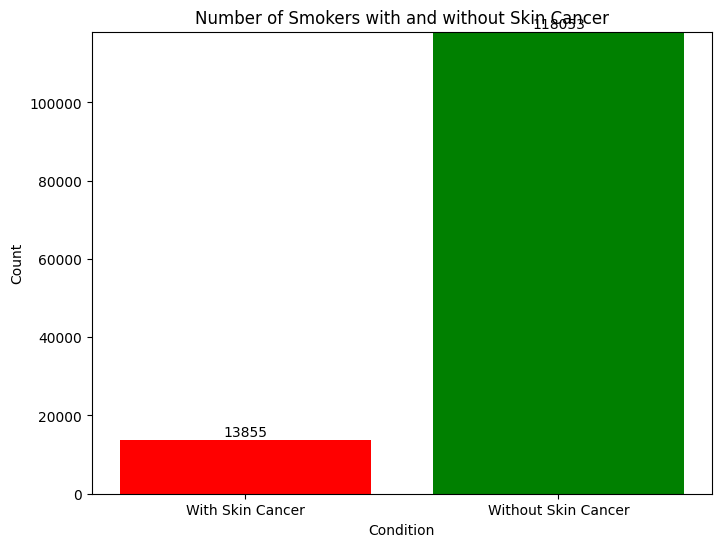

In [8]:
# Count the number of smokers with skin cancer
smokers_with_skin_cancer = data[(data['Smoking'] == 'Yes') & (data['SkinCancer'] == 'Yes')].shape[0]

# Count the number of smokers without skin cancer
smokers_without_skin_cancer = data[(data['Smoking'] == 'Yes') & (data['SkinCancer'] == 'No')].shape[0]

# Total number of smokers
total_smokers = smokers_with_skin_cancer + smokers_without_skin_cancer

# Calculate probability
probability_skin_cancer_given_smoking = smokers_with_skin_cancer / total_smokers
print(f"Probability of Skin Cancer given Smoking: {probability_skin_cancer_given_smoking:.4f}")

# Data for the bar plot
labels = ['With Skin Cancer', 'Without Skin Cancer']
counts = [smokers_with_skin_cancer, smokers_without_skin_cancer]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['red', 'green'])
plt.title('Number of Smokers with and without Skin Cancer')
plt.ylabel('Count')
plt.xlabel('Condition')
plt.ylim(0, max(counts) + 5)  # Add some space above the highest bar for better visualization

# Add data labels on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

# Display the plot
plt.show()

#### QUESTION FOUR: Explain the relationship between any two continuous variables?

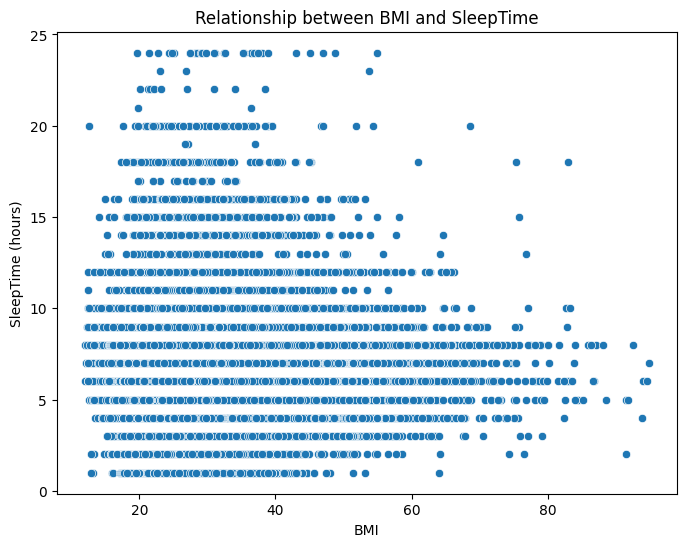

Correlation between BMI and SleepTime: -0.05


In [9]:
#figure size for the scatter plot
plt.figure(figsize=(8, 6))

#scatter plot to visualize the relationship between BMI and SleepTime
sns.scatterplot(x=data['BMI'], y=data['SleepTime'])

#title of the plot
plt.title('Relationship between BMI and SleepTime')

# Label the x-axis as 'BMI'
plt.xlabel('BMI')

# Label the y-axis as 'SleepTime (hours)'
plt.ylabel('SleepTime (hours)')

# Display the scatter plot
plt.show()

# Calculate the correlation coefficient between BMI and SleepTime
correlation = data['BMI'].corr(data['SleepTime'])

# Print the correlation result with 2 decimal places
print(f"Correlation between BMI and SleepTime: {correlation:.2f}")

#### QUESTION FIVE: Based on the variable “HeartDisease”, which "GenHealth" status  would you advise patients to maintain?

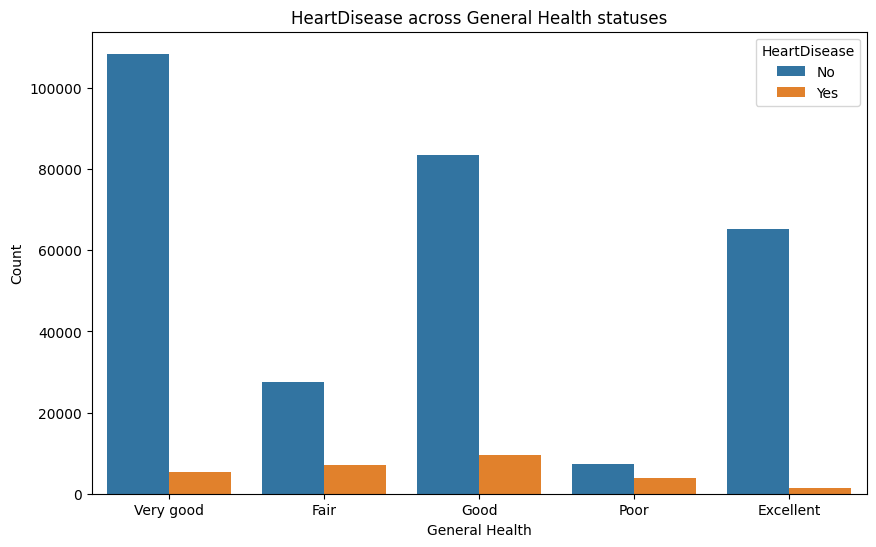

In [10]:
#figure size for the count plot
plt.figure(figsize=(10, 6))

#count plot to visualize the number of people with and without heart disease across different general health statuses
sns.countplot(x='GenHealth', hue='HeartDisease', data=data)

#title of the plot
plt.title('HeartDisease across General Health statuses')

# Label the x-axis
plt.xlabel('General Health')

# Label the y-axis
plt.ylabel('Count')

# Display the count plot
plt.show()